In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import joblib
from sklearn.model_selection import RandomizedSearchCV, train_test_split

#  El EDA de este Proyecto es diferente al usado en el Decision_Tree.
#  Siguiendo las recomendaciones de mi profesor, se reviso en EDA, si bien en el Estudio PRevio, se retiraron los #  #  registros que poseeian Valores no logico (Valor = 0) en varios Campos: Presion = 0, Insulina = 0, 
#  Grosos_De_la_Piel=0, BMI=0
#  Sin embargo, dejamos como parte de analisis los Insuline = 0, pero que tuvieran Glucosa != 0  y Outcome =1 (138 Elementos).  Tomamos esta decision porque La correlacion de la Glucosa respecto al Outcome es de 0.46 y de la insulina vs Outcome es negativa... (-0.15) 


In [3]:
# Cargo mis Ultimas Versiones de los EDA de la Insulina
train_Insulina = pd.read_csv('../data/train_Insulina.csv', sep = ",")
test_Insulina = pd.read_csv('../data/test_Insulina.csv', sep = ",")

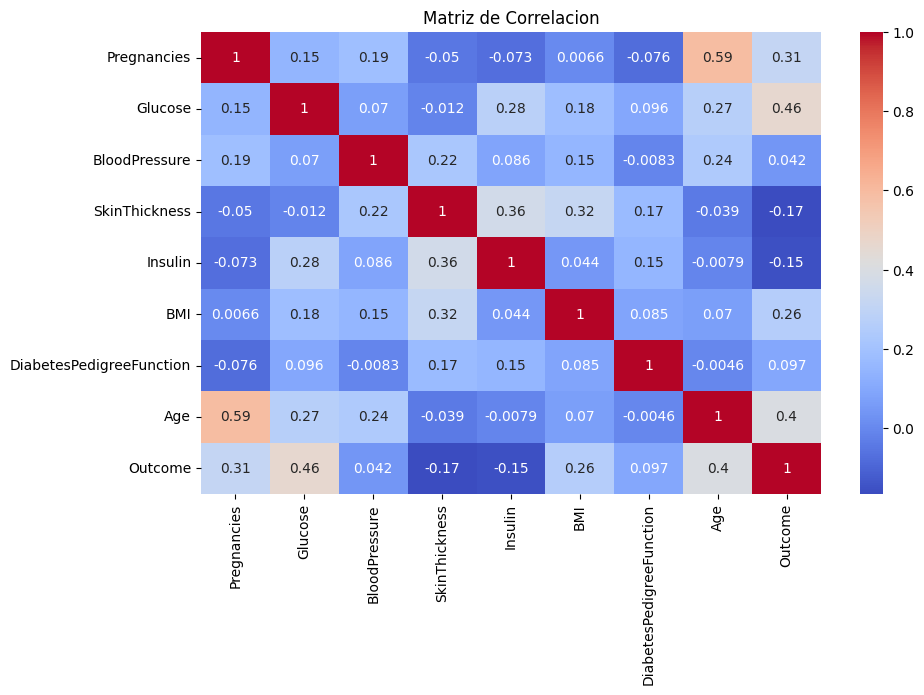

In [4]:
#******************************************************************************************************
#              Voy A Colocar El Analiziz MultiVariable A PArtir de Aqui
#******************************************************************************************************
#Correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(train_Insulina.corr(), annot=True, cmap='coolwarm')# sirve para ver la correlacion entre variables.
plt.title("Matriz de Correlacion")
plt.show()

In [5]:
def Precision_Omega(y_test_o, y_pred_o):
    from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, mean_squared_error, r2_score

    # comprobaciones del modelo.
    print(f"Accuracy: {accuracy_score(y_test_o, y_pred_o):.4f}") # Precisión general del modelo
    print(f"Precision: {precision_score(y_test_o, y_pred_o):.4f}") # Mide la proporción de positivos reales entre los predichos como positivos
    print(f"Recall: {recall_score(y_test_o, y_pred_o):.4f}") # Evalúa qué porcentaje de casos positivos fueron correctamente identificados
    print(f"F1 Score: {f1_score(y_test_o, y_pred_o):.4f}") # Combina precisión y recall para una evaluación equilibrada
   
   #Metricas de Regresion
    #print(f"Error cuadrático medio: {mean_squared_error(y_test_o, y_pred_o)}")
    #print(f"Coeficiente de determinación: {r2_score(y_test_o, y_pred_o)}")


def Matriz_Confusion(y_test_o, y_pred_o):

    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import confusion_matrix

    # Matriz de confusión
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds',
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title("Matriz de Confusión")
    plt.show()

In [6]:
#===============================================================================
#                      Mi Script Para El Split
#===============================================================================

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Crear el escalador
X_train= train_Insulina.drop(columns=["Outcome"])
y_train = train_Insulina["Outcome"]
X_test= test_Insulina.drop(columns=["Outcome"])
y_test = test_Insulina["Outcome"]



In [7]:
# Vamos a usar el Algoritmo de Boosting XGBClassifier
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators = 200, max_depth = 10, learning_rate = 0.001, random_state = 42)
model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [8]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1])

Accuracy: 0.7664
Precision: 0.8000
Recall: 0.7586
F1 Score: 0.7788


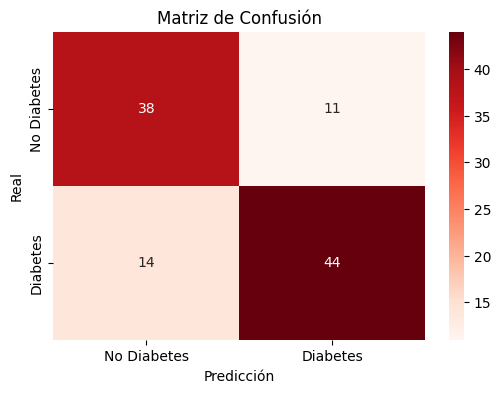

In [9]:
# Ver resultados de Precision

Precision_Omega(y_test, y_pred)
Matriz_Confusion(y_test, y_pred)

In [10]:
#Busqueda random de mejores hiperparametros
hyperpa = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7, 10, 15, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
}

xgb = XGBClassifier(eval_metric='auc')
Busqueda_Boost= RandomizedSearchCV(xgb, param_distributions=hyperpa, n_iter=50, scoring='accuracy', cv=5, verbose=0)
Busqueda_Boost.fit(X_train, y_train)

,estimator,"XGBClassifier...ree=None, ...)"
,param_distributions,"{'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 5, ...], 'n_estimators': [100, 300, ...], 'subsample': [0.6, 0.8, ...]}"
,n_iter,50
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [11]:
print(Busqueda_Boost.best_score_)
print(Busqueda_Boost.best_params_)

0.851764705882353
{'subsample': 0.6, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.05}


In [12]:
modelo_boosting2 = XGBClassifier(subsample= 0.6, n_estimators = 300, max_depth = 20, learning_rate = 0.05)
modelo_boosting2.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [13]:
y_pred = modelo_boosting2.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0])

Accuracy: 0.8037
Precision: 0.8246
Recall: 0.8103
F1 Score: 0.8174


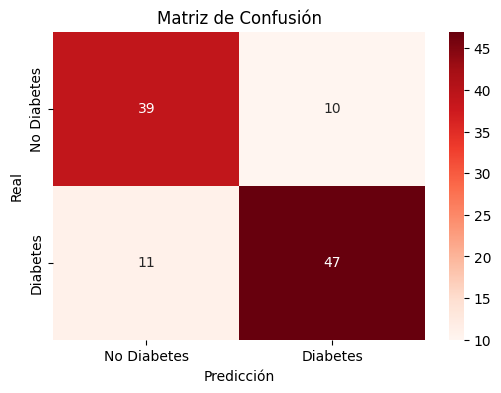

In [14]:
# Ver resultados de Precision

Precision_Omega(y_test, y_pred)
Matriz_Confusion(y_test, y_pred)

In [15]:

joblib.dump(model, '../models/modelo_boosting_200_10_0_001.pkl')
joblib.dump(modelo_boosting2, '../models/modelo_boosting2_500_10_0_05.pkl')

['../models/modelo_boosting2_500_10_0_05.pkl']

Este ha sido el Mejor modelo de PRediccion, con unas Estadisticas muy Superiores en El Accuracy y y en la deteccion de verdaderos NEgativo y Positivos.

Accuracy: 0.8037

Precision: 0.8246

Recall: 0.8103

F1 Score: 0.8174

In [16]:
# Los Resultados de Clasificacion son mejores que los obtenitos con los Otros m
importancias = Busqueda_Boost.best_estimator_.feature_importances_

In [17]:
importancias_df = pd.DataFrame({
    'Caracteristica': X_train.columns,
    'Importancia': Busqueda_Boost.best_estimator_.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print(importancias_df)

             Caracteristica  Importancia
4                   Insulin     0.295372
1                   Glucose     0.184991
7                       Age     0.115171
5                       BMI     0.088181
6  DiabetesPedigreeFunction     0.087054
3             SkinThickness     0.077374
0               Pregnancies     0.076528
2             BloodPressure     0.075328
